<a href="https://colab.research.google.com/github/hargettc2015/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here


**Anatomy of a Matplotlib Plot**

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [0]:
np.random.seed(19680801)

<function matplotlib.pyplot.show>

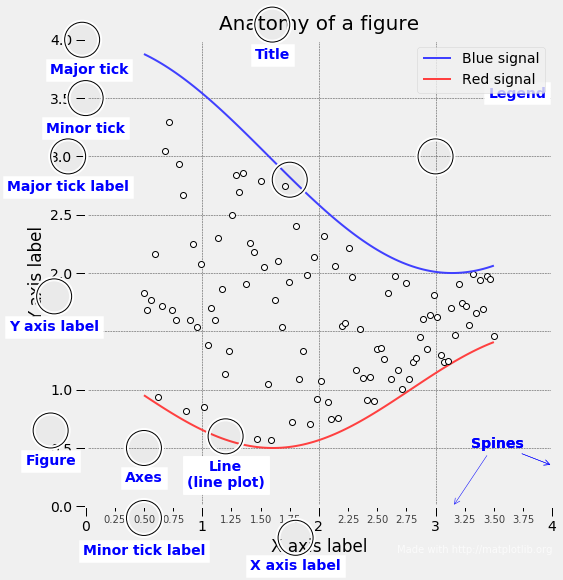

In [98]:
X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
  if not x % 1.0:
    return ""
  return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker= 'o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
  from matplotlib.patches import Circle
  from matplotlib.patheffects import withStroke
  circle= Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                 edgecolor='black', facecolor=(0, 0, 0, .0125), 
                 path_effects=[withStroke(linewidth=5, foreground='w')])
  ax.add_artist(circle)


def text(x, y, text): 
  ax.text(x, y, text, backgroundcolor="white", 
          ha='center', va='top', weight='bold', color='blue')
  
#Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

#Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

#Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick" )

#Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

#X label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

#Y label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

#Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

#Blue plot
circle(1.75, 2.80)
text(1.20, 0.40, "Line\n(line plot)")

#Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

#Grid
circle(3.00, 3.00)
text(3.70, 3.60, "Legend")

#Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

#Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))
ax.annotate('', xy=(3.15,0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org", 
        fontsize=10, ha="right", color='5');

plt.show

**Matplotlib Pyplot Syntax**

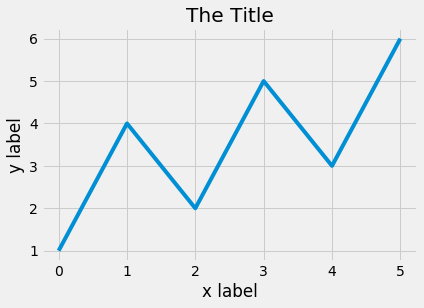

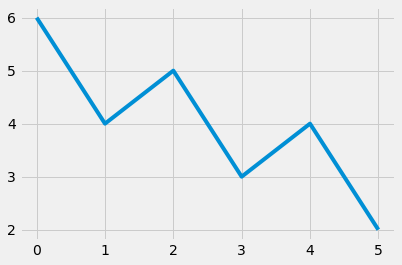

In [99]:
import matplotlib.pyplot as plt

sample_data = [1,4,2,5,3,6]
plt.plot(sample_data)
plt.title("The Title")
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

more_data = [6,4,5,3,4,2]
plt.plot(more_data)
plt.show()

**Difference between figure and axes**

Text(0.5, 0, 'my x label')

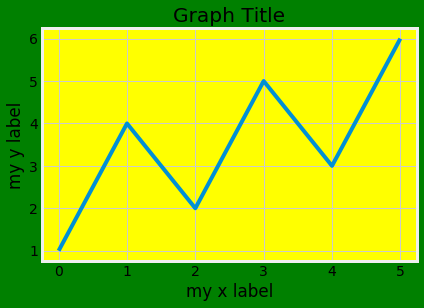

In [100]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='green')

ax.plot(sample_data)
ax.set(facecolor="yellow")
ax.set_title("Graph Title")
ax.set_ylabel('my y label')
ax.set_xlabel('my x label')

**Making Explanatory Visualizations with Matplotlib**

In [101]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

**Making Prototype**

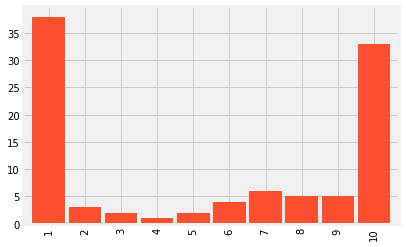

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

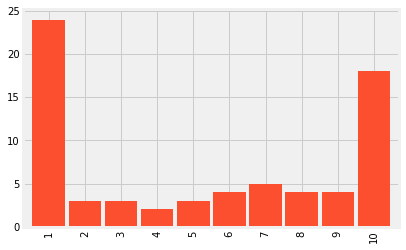

In [103]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

#fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [104]:
display(example)

**Annotate with text**

In [0]:
# Set stylesheet
plt.style.use('fivethirtyeight')

#figure axes syntax
fig, ax = plt.subplots()

#make the figure background color white 
fig.patch.set(facecolor='white')

#put bars on the axes 
fake.plot.bar(width=0.9, color='#ED713A')

#set axes background color
ax.set(facecolor='white')

#set plot title
ax.set_title("'An Inconvenient Sequel: truth To Power' is divisive", fontsize=12, fontweight='bold', x= .35, y=1.1)

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=41.5, x=-1.8, fontsize=12)

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0,50,10))

# Set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10)

# Show the plot and squelch the funny output
fig.show()



In [106]:
list(range(0,10, 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [107]:
list(range(5, 55, 5))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [108]:
list(range(0,100,20))

[0, 20, 40, 60, 80]

In [0]:
#Just a random note for me :) 
#circles?
#def circle(x, y, radius=0.05):
    #from matplotlib.patches import Circle
    #from matplotlib.patheffects import withStroke
    #circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    #edgecolor='#009C05', facecolor=(0, 0, 0, .0125),
                    #path_effects=[withStroke(linewidth=5, foreground='w')])
    #ax.add_artist(circle)

In [109]:
display(example)

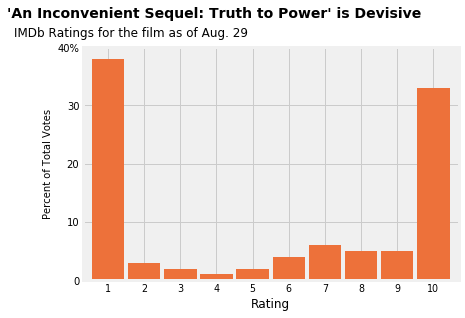

In [114]:
#we are just making a basic thing to get started
fig, ax = plt.subplots()
#this is letting you do things on the figure
#and also axes 

#still need to extend x axis ticks
#change color of bars (in notes)


#make the background white
fig.patch.set(facecolor='white')

#puts bars on the plot
fake.plot.bar(width= 0.9, color = '#ED713A')

#set axes backfound color
ax.set

#title
ax.set_title("'An Inconvenient Sequel: Truth to Power' is Devisive", fontsize=14, fontweight='bold', x=.35, y=1.1)
#the inner quoues re what will show up 

#y label text
ax.set_ylabel('Percent of Total Votes', fontsize=10)

#x label text 
ax.set_xlabel('Rating', fontsize=12)

#sub title tedxt
ax.text(s='IMDb Ratings for the film as of Aug. 29',y=41.8, x=-2.6, fontsize=12 )
#we made a raw text thing that is the same as our labels, 
#without that direction in place, so we can manipulate it

#here we set the ticks and labels for y axis
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks([0, 10, 20, 30, 40])

#tick labels for x axis
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=9.5)
#ax.set_xticks(length=5)

#fixes spines by removing them.
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)

plt.show() #this line tells matplot you are done



**Replicating

In [116]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/03/roeder-pepe-dankpepe1.png?w=1150'
myexample = Image(url=url, width=400)

display(myexample)

In [0]:
#Uploading what I need 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

plt.style.use('fivethirtyeight')

mychart= pd.Series([0, 0, 0, 0.3, 0.4, 5, 20, 6, 3, 30, 20, 20, 4, 20, 150, 1, 115, 50, 60, 190, 20, 100, 75, 10, 50, 115, 595],
                   index=range(1,28))

mydots = [0, 0, 0, 0.3, 0.4, 5, 20, 6, 3, 30, 20, 20, 4, 20, 150, 1, 115, 50, 60, 190, 20, 100, 75, 10, 50, 115, 595]


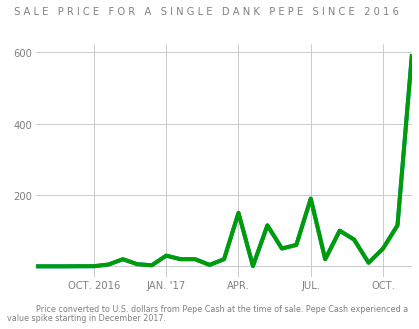

In [121]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.set(facecolor='white')
#puts in bars on the graph to make it easier to read. mychart is a variable.
mychart.plot.line()
#This changes the color to another color, look on matplotlib
mychart.plot.line(color = '#009C05')
#This sets your title, use spaces and caps for a nice title. 
ax.set_title(' S A L E   P R I C E   F O R   A   S I N G L E   D A N K   P E P E   S I N C E   2 0 1 6', fontsize=10, y=1.1, x=.45, color='grey')
#This part sets your y-axis
ax.set_yticklabels(['', '200', '400','600'], fontsize=10, color='grey')
ax.set_yticks([0, 200, 400, 600])
#This sets my x-axis
ax.set_xticklabels([' ','OCT. 2016', "JAN. '17", 'APR.', 'JUL.', 'OCT.', "JAN. '18"], fontsize= 10, color='grey')
#This is my subtext ('Text at the bottom')
ax.text(s= 'Price converted to U.S. dollars from Pepe Cash at the time of sale. Pepe Cash experienced a', x=1, y=-125, fontsize=8, color='grey')
ax.text(s='value spike starting in December 2017.', x=-1, y=-150, fontsize= 8, color='grey')
#This takes away the spines that are automatically put around your graph (the frame)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here